<a href="https://colab.research.google.com/github/Saulo-Ferraz/PythonCodes/blob/main/Lista_8_Saulo_Raphael.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lista 8 de exercícios - Visualização de dados

Chegamos à ultima lista de exercícios do nosso curso, do tema "Visualização de dados". Aqui, usaremos um *dataset* de dados de uma certa clínica médica, em que cada observação corresponde a um paciente. Importemos os dados:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# Baixando os dados
data = pd.read_csv("insurance.csv")

Breve descrição das colunas:


**age**: idade do beneficiário primário

**sex**: gênero do contratante

**bmi**: índice de massa corporal (IMC)

**children**: número de crianças cobertas pelo plano / número de dependentes

**smoker**: fumante ("yes", se fumante; "no", se não fumante)

**region**: área residencial do paciente nos EUA: Nordeste (northeast), Sudeste (southeast), Sudoeste (southwest), Noroeste (northwest).

**charges**: custos médicos individuais cobrados pelo plano de saúde

Explorando os dados:

In [4]:
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
data.shape

(1338, 7)

In [8]:
data.columns.values

array(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'],
      dtype=object)

## Exercícios:

### 1) Faça um gráfico para analisar a associação entre idade e cobrança do plano.

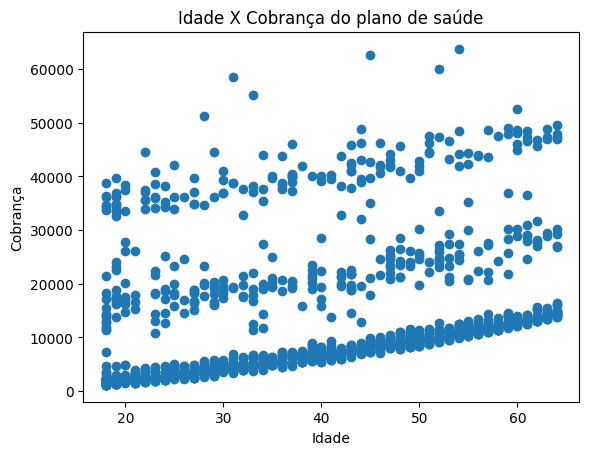

In [9]:
# Resposta
plt.scatter(data["age"], data["charges"])
plt.xlabel("Idade")
plt.ylabel("Cobrança")
plt.title("Idade X Cobrança do plano de saúde")
plt.show()

### 2)

#### a) Faça um gráfico para analisar a quantidade de fumantes e não-fumantes na amostra

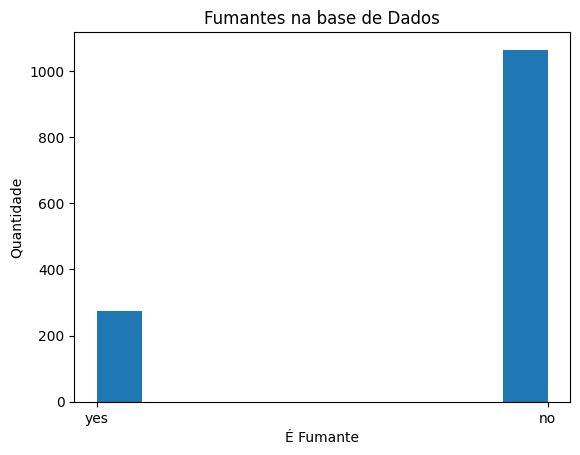

In [11]:
# Resposta
plt.hist(data["smoker"])
plt.xlabel("É Fumante")
plt.ylabel("Quantidade")
plt.title("Fumantes na base de Dados")
plt.show()

#### b) Agora, faça um gráfico para analisar a quantidade de homens e mulheres na amostra

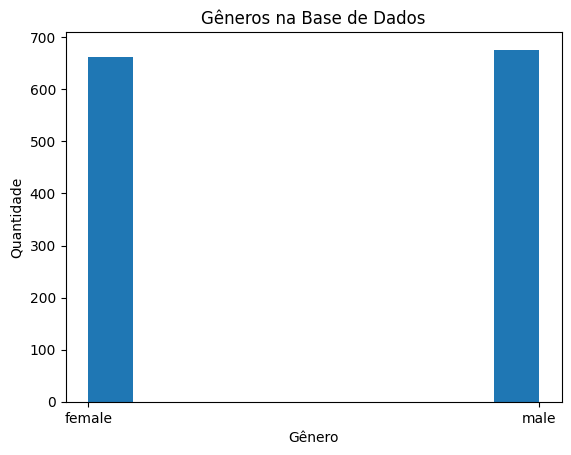

In [13]:
# Resposta
plt.hist(data["sex"])
plt.xlabel("Gênero")
plt.ylabel("Quantidade")
plt.title("Gêneros na Base de Dados")
plt.show()

#### c) Por fim, faça um gráfico para analisar a quantidade de indivíduos de cada sexo em cada categoria de "smoker" (fumante)
dica: dê uma olhada na função ```.countplot()``` do *Seaborn*

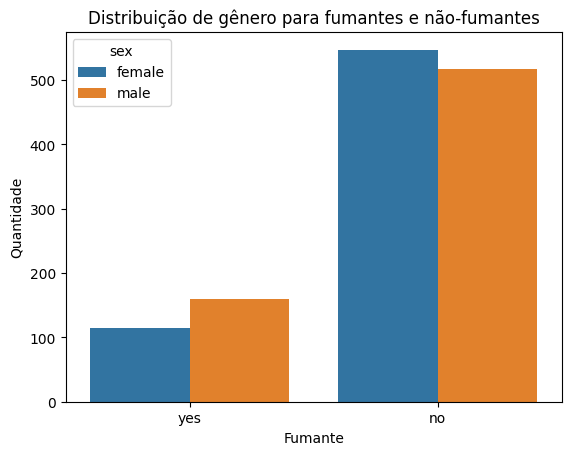

In [14]:
# Resposta
sns.countplot(x = "smoker", hue = "sex",  data = data)
plt.xlabel("Fumante")
plt.ylabel("Quantidade")
plt.title("Distribuição de gênero para fumantes e não-fumantes")
plt.show()

### 3) Faça um gráfico que nos permita analisar a distribuição da cobrança do plano de saúde para cada região dos EUA

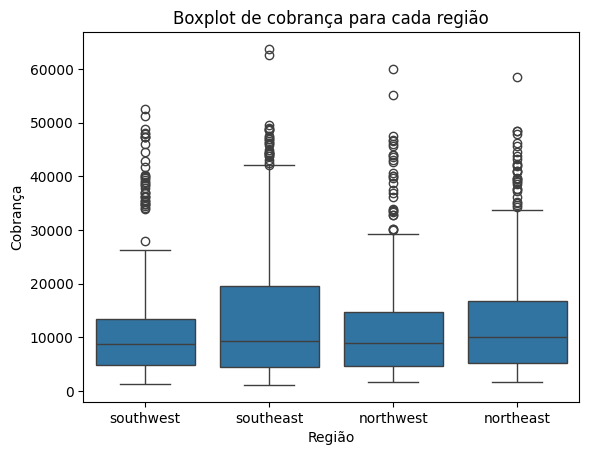

In [15]:
# Resposta
sns.boxplot(x = data["region"], y = data["charges"])
plt.xlabel("Região")
plt.ylabel("Cobrança")
plt.title("Boxplot de cobrança para cada região")
plt.show()

### 4) Crie gráficos que nos permitam ver a distribuição de alguns dados para cada idade na amostra.

#### a) Faça um gráfico que nos permita ver a evolução da proporção de fumantes para cada idade na amostra

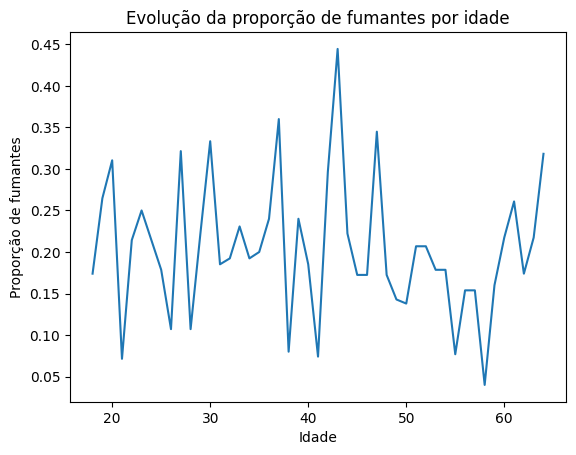

In [16]:
# Resposta
def prop_fumante_idade(age, data = data):
    """
    Calcula a proporção de fumantes para cada idade
    """
    return (len(data[(data["smoker"] == "yes") & (data["age"] == age)])/len(data[data["age"] == age]))
props = {age: prop_fumante_idade(age) for age in sorted(data["age"].unique())}
plt.plot(props.keys(), props.values())
plt.xlabel("Idade")
plt.ylabel("Proporção de fumantes")
plt.title("Evolução da proporção de fumantes por idade")
plt.show()

#### b) Faça um gráfico que nos permita ver a evolução do IMC médio para cada idade na amostra

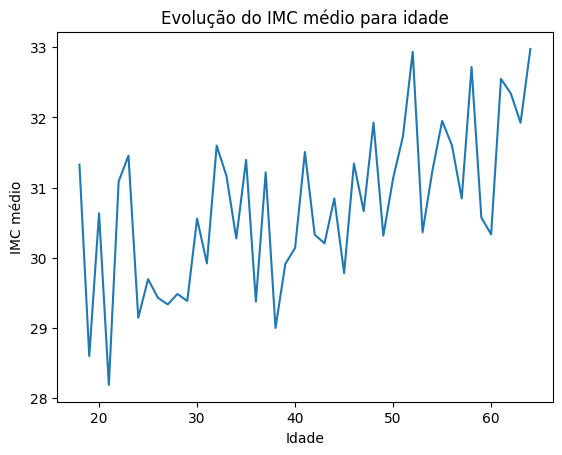

In [17]:
# Resposta
def IMC_medio_idade(age, data = data):
    """
    Calcula o IMC médio para cada idade
    """
    return np.mean(data[data["age"] == age]["bmi"])
imcs = {age: IMC_medio_idade(age) for age in sorted(data["age"].unique())}
plt.plot(imcs.keys(), imcs.values())
plt.xlabel("Idade")
plt.ylabel("IMC médio")
plt.title("Evolução do IMC médio para idade")
plt.show()

#### c) Faça um gráfico que nos permita analisar a evolução do número médio de crianças no plano para cada idade na amostra

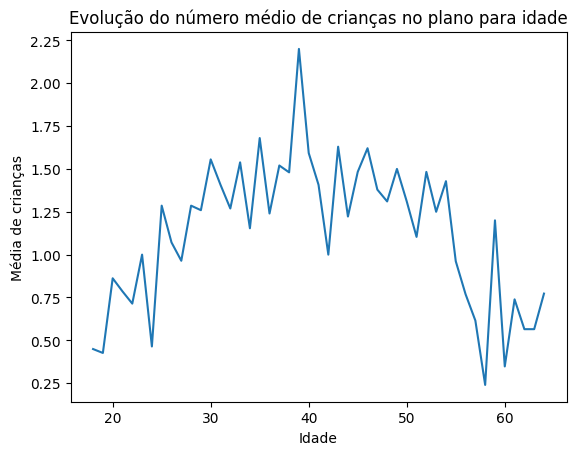

In [18]:
# Resposta
def media_criancas_idade(age, data = data):
    """
    Calcula o número médio de crianças no plano por idade
    """
    return np.mean(data[data["age"] == age]["children"])
medias = {age: media_criancas_idade(age) for age in sorted(data["age"].unique())}
plt.plot(medias.keys(), medias.values())
plt.xlabel("Idade")
plt.ylabel("Média de crianças")
plt.title("Evolução do número médio de crianças no plano para idade")
plt.show()

### 5) Faça um gráfico que nos permita analisar a correlação entre todas as colunas ao mesmo tempo (para incluir "sex" e "smoker" na análise, crie variáveis binárias para cada uma das colunas)
dica: crie um novo dataframe com as duas colunas citadas com variáveis binárias

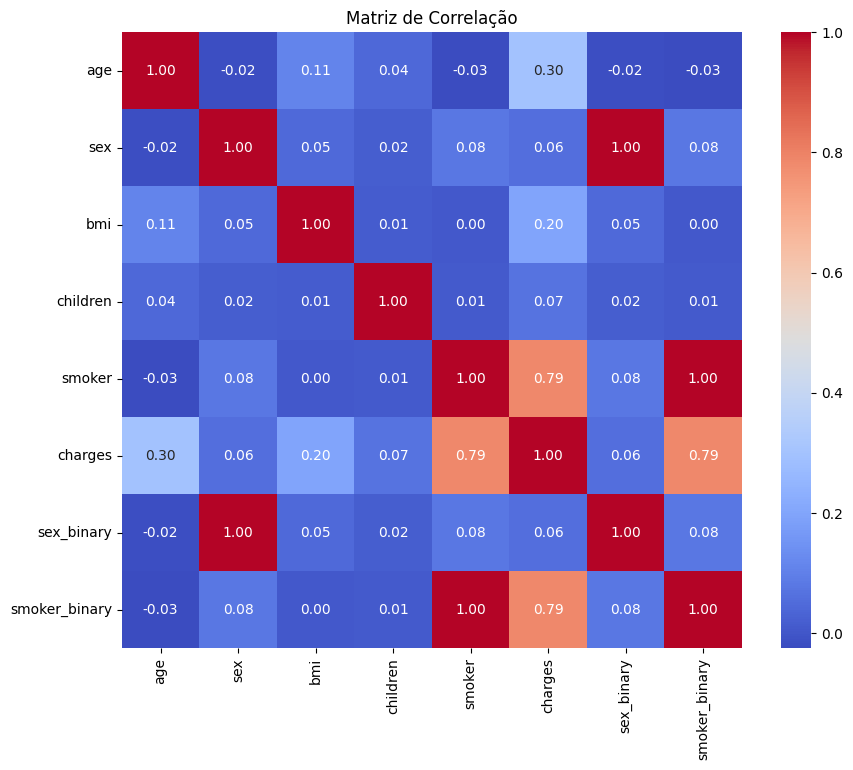

In [25]:
# Resposta
bin_genero = data["sex"].apply(lambda x: 1 if x == "male" else 0)
bin_smoker = data["smoker"].apply(lambda x: 1 if x == "yes" else 0)
data_ = data.copy()
data_["sex"], data_["smoker"] = bin_genero, bin_smoker

data_.drop('region', axis=1, inplace=True)

corrs = data_.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corrs, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

### 6) Faça um gráfico interativo e dinâmico da distribuição de cobrança para fumantes e não-fumantes
dica: o nome da função na biblioteca é ```.box()```

In [26]:
# Resposta
px.box(x = "smoker", y = "charges", data_frame = data, title = "Distribuição de cobrança para fumantes e não fumantes")